#### import italy-covid-daywise.csv which contains day-wise Covid-19 data for Italy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_covid=pd.read_csv('italy-covid-daywise.csv')
data_covid.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


#### retrieve the number of rows and columns in the data frame

In [ ]:
data_covid.shape

(248, 4)

##### insight: number of rows :248 ,number of column :4

#### view statistical information for numerical columns


In [ ]:
data_covid.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


##### view some basic information about the data frame like data types, and number of non-nulls


In [ ]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


#### create a list of columns within the data frame

In [ ]:
list(data_covid.columns)

['date', 'new_cases', 'new_deaths', 'new_tests']

##### return only the days which had more than 1000 reported cases


In [ ]:
data_covid[data_covid['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


#### create positive_rate column that is equal to new_cases / new_tests


In [ ]:
data_covid['positive_rate']=data_covid['new_cases'] / data_covid['new_tests']

In [ ]:
data_covid['positive_rate']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Name: positive_rate, Length: 248, dtype: float64

In [ ]:
data_covid.head()

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


#### let's remove the positive_rate column


In [ ]:
data_covid=data_covid.drop('positive_rate',axis=1)
data_covid.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


#### sort to identify the days with the highest number of cases


In [ ]:
data_covid.sort_values(by = ['new_cases'],ascending = False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


##### check the data type of date column


In [ ]:
data_covid['date'].dtype

dtype('O')

In [ ]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


#### then convert it into a datetime

In [ ]:
data_covid['date'] = pd.to_datetime(data_covid['date'], errors='coerce')

In [ ]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


#### extract different parts (day, month, weekday, and year) of the date column into separate columns


In [ ]:
data_covid['day']=data_covid['date'].dt.day
data_covid['month']=data_covid['date'].dt.month
data_covid['year']=data_covid['date'].dt.year
data_covid['weekday']=data_covid['date'].dt.weekday


In [ ]:
data_covid.head()

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
0,2019-12-31,0.0,0.0,NaN,31,12,2019,1
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2
2,2020-01-02,0.0,0.0,NaN,2,1,2020,3
3,2020-01-03,0.0,0.0,NaN,3,1,2020,4
4,2020-01-04,0.0,0.0,NaN,4,1,2020,5


In [ ]:
# data_covid=data_covid.drop('date',axis=1)
# data_covid.head()

#### check the overall metrics for May

In [ ]:
data_covid[data_covid['month']==5]

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
122,2020-05-01,1872.0,285.0,43732.0,1,5,2020,4
123,2020-05-02,1965.0,269.0,31231.0,2,5,2020,5
124,2020-05-03,1900.0,474.0,27047.0,3,5,2020,6
125,2020-05-04,1389.0,174.0,22999.0,4,5,2020,0
126,2020-05-05,1221.0,195.0,32211.0,5,5,2020,1
127,2020-05-06,1075.0,236.0,37771.0,6,5,2020,2
128,2020-05-07,1444.0,369.0,13665.0,7,5,2020,3
129,2020-05-08,1401.0,274.0,45428.0,8,5,2020,4
130,2020-05-09,1327.0,243.0,36091.0,9,5,2020,5
131,2020-05-10,1083.0,194.0,31384.0,10,5,2020,6


#### which day seems like have more cases

In [ ]:
data_covid['new_cases'].max()

6557.0

In [ ]:
data_covid[data_covid['new_cases']==6557.0]

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
82,2020-03-22,6557.0,795.0,NaN,22,3,2020,6


#### create a new dataframe with month-wise data


In [ ]:
month_wise=pd.DataFrame(data_covid['month'])
month_wise.head()

,month
0,12
1,1
2,1
3,1
4,1


#### plot a line graph showing how the number of daily cases varies over time

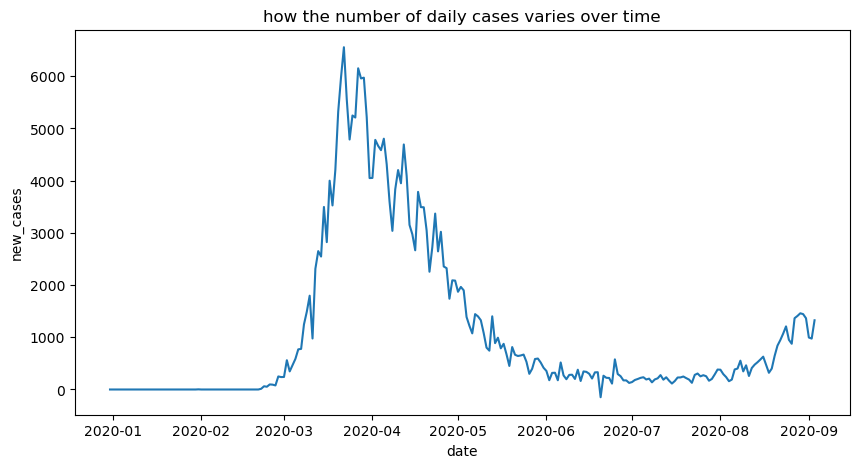

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_covid['date'],data_covid['new_cases'])
plt.title('how the number of daily cases varies over time')
plt.xlabel('date')
plt.ylabel('new_cases')
plt.show()